<a href="https://colab.research.google.com/github/Priyagane/Deeplearning/blob/main/MNIST_handwritten_classification_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Section I.I : Initial Data Indagation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout
(trainsetX, trainsety),(testsetX,testsety) = mnist.load_data()

print('Train: X = {}, y = {}'.format(trainsetX.shape, trainsety.shape)) 
print('Test: X = {}, y = {}'.format(testsetX.shape, testsety.shape))

11501568/11490434 [==============================] - 0s 0us/step
Train: X = (60000, 28, 28), y = (60000,)
Test: X = (10000, 28, 28), y = (10000,)


Section I.II : Initial EDA

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

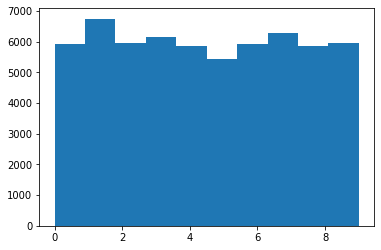

In [2]:
plt.hist(trainsety)

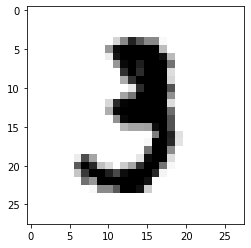

number is: 3
**************************************************


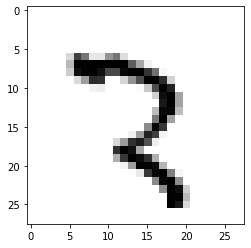

number is: 3
**************************************************


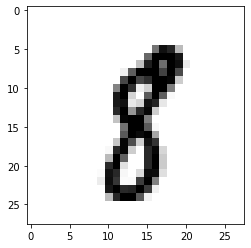

number is: 8
**************************************************


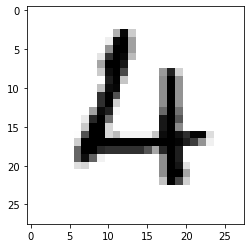

number is: 4
**************************************************


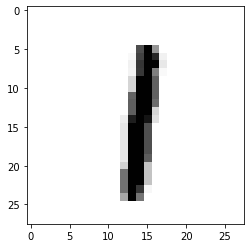

number is: 1
**************************************************


In [3]:
list1= [10,500,300,1050,40]
for i in list1:
 plt.imshow(trainsetX[i],cmap='binary')
 plt.show()
 print('number is:',trainsety[i])
 print('*'*50)
 

Section II : Data Preparation

In [4]:
#Normalize the pixel value

trainsetX = trainsetX.astype(np.float32)/255
testsetX = testsetX.astype(np.float32)/255


In [5]:
#Reshape the dimension to (28,28,1)
X_train = np.expand_dims(trainsetX,-1)
X_test =  np.expand_dims(testsetX,-1)


In [6]:
X_train.shape

(60000, 28, 28, 1)

In [7]:
#convert the classes to one hot vectors
y_train = keras.utils.np_utils.to_categorical(trainsety)
y_test = keras.utils.np_utils.to_categorical(testsety)

In [8]:
trainsety[5]

2

In [9]:
y_train[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Section III : Model Construction

In [10]:
#Initialising the CNN
model = Sequential()

#Convolution
model.add(Conv2D(128,(3,3),input_shape=(28,28,1),activation= 'relu'))
#Pooling
model.add(MaxPool2D((2,2)))

#Adding a second convolutional layer and Pooling
model.add(Conv2D(64,(3,3),activation= 'relu'))
model.add(MaxPool2D((2,2)))

#Flattening
model.add(Flatten())

#Dropout
model.add(Dropout(0.25))

#Output Layer
model.add(Dense(10, activation='softmax'))

In [11]:
#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

Training the CNN

In [12]:
#Compiling the CNN
from tensorflow.python import metrics
model.compile(optimizer='adam', loss = keras.losses.categorical_crossentropy,metrics=['accuracy'])


In [13]:
#Callbacks
from keras.callbacks import  ModelCheckpoint


#Model Check Point
mc = ModelCheckpoint("./bestmodel.h5",mointer='val_acc',verbose=1,save_best_only= True)

cb = [mc]

In [14]:
#Training the CNN on the Training set and evaluating it on the Test set
from keras import callbacks
his = model.fit(X_train,y_train,epochs=10,validation_split=0.3,callbacks=cb)

Epoch 1/10
1313/1313 [==============================] - ETA: 0s - loss: 0.1859 - accuracy: 0.9418
Epoch 1: val_loss improved from inf to 0.08405, saving model to ./bestmodel.h5
1313/1313 [==============================] - 19s 5ms/step - loss: 0.1859 - accuracy: 0.9418 - val_loss: 0.0840 - val_accuracy: 0.9749
Epoch 2/10
1303/1313 [============================>.] - ETA: 0s - loss: 0.0632 - accuracy: 0.9807
Epoch 2: val_loss improved from 0.08405 to 0.05585, saving model to ./bestmodel.h5
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0630 - accuracy: 0.9807 - val_loss: 0.0559 - val_accuracy: 0.9828
Epoch 3/10
1302/1313 [============================>.] - ETA: 0s - loss: 0.0468 - accuracy: 0.9853
Epoch 3: val_loss improved from 0.05585 to 0.04778, saving model to ./bestmodel.h5
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0467 - accuracy: 0.9854 - val_loss: 0.0478 - val_accuracy: 0.9864
Epoch 4/10
1308/1313 [============================>.] - ETA: 

In [15]:
#loading the trained model
from keras.models import load_model
model_s=load_model("/content/bestmodel.h5")

In [16]:
#prediction accuracy
score = model_s.evaluate(X_test,y_test)
print(f"the model accuracy is {score[1]}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0273 - accuracy: 0.9916
the model accuracy is 0.991599977016449


In [17]:
#prediction on TESTSET
pred = model.predict(X_test)
preds = np.argmax(pred,axis=1)

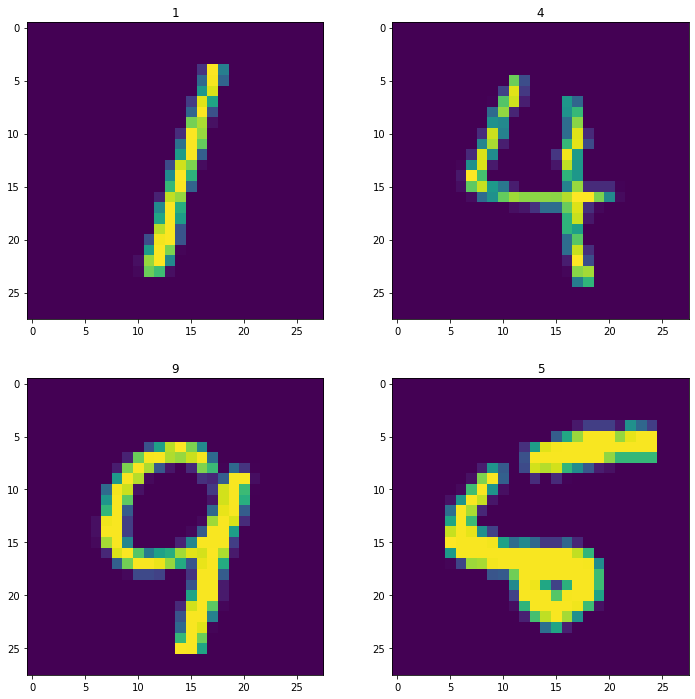

In [24]:
list1=[2,24,16,8]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
for i, ax in zip(list1, axs.ravel()):
    
    ax.imshow(testsetX[i])

    ax.set_title(preds[i])